<a href="https://colab.research.google.com/github/Poojitha1999/30-seconds-of-cpp/blob/master/RBF_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])

In [0]:
trainset = datasets.MNIST('.', download=True, train=True, transform=transform)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [0]:
valset = datasets.MNIST('.',download=True, train = False, transform = transform)

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=100, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


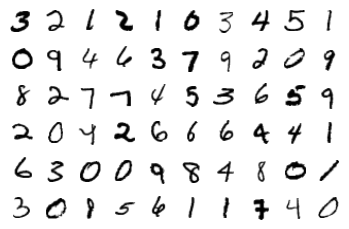

In [0]:
figure = plt.figure()
num_of_images = 60
for index in range(1,num_of_images+1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(),cmap = 'gray_r')

In [0]:
class ConvNet2(nn.Module):
    def __init__(self):
        super(ConvNet2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        # self.drop_out = nn.Dropout()
        # self.fc1 = nn.Linear(7 * 7 * 64, 10)
#         self.fc2 = nn.Linear(1000, 10)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        # out = out.reshape(out.size(0), -1)
        # out = self.drop_out(out)
        # out = self.fc1(out)
#         out = self.fc2(out)
        return out

In [0]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [0]:
model = ConvNet()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
# Train the model
num_epochs = 1
total_step = len(trainloader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Run the forward pass
#         images= images.view(100,28,28,1)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/1], Step [100/600], Loss: 0.1758, Accuracy: 94.00%
Epoch [1/1], Step [200/600], Loss: 0.2376, Accuracy: 94.00%
Epoch [1/1], Step [300/600], Loss: 0.2675, Accuracy: 94.00%
Epoch [1/1], Step [400/600], Loss: 0.0771, Accuracy: 99.00%
Epoch [1/1], Step [500/600], Loss: 0.0829, Accuracy: 96.00%
Epoch [1/1], Step [600/600], Loss: 0.1158, Accuracy: 97.00%


In [0]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(model.state_dict(),'conv_net_model.ckpt')

Test Accuracy of the model on the 10000 test images: 98.41 %


In [0]:
model2 = ConvNet2()
model_dict = model2.state_dict()
pretrained_dict = torch.load('conv_net_model.ckpt')

In [0]:
pretrained_dict = {k: v for k, v in pretrained_dict.items() if "layer" in k}

In [0]:
model_dict.update(pretrained_dict)
model2.load_state_dict(model_dict)

<All keys matched successfully>

In [0]:
pretrained_dict.keys()

dict_keys(['layer1.0.weight', 'layer1.0.bias', 'layer2.0.weight', 'layer2.0.bias'])

In [0]:
print(model2)

ConvNet2(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [0]:
print(model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)


In [0]:
for param1,param2 in zip(model2.named_parameters(),model.named_parameters()):
    try:
        if(param1.allclose(param2)):
            print(param1[0])
            print("Ok")
        else:
            print("Nope")
    except:
        print(param1[0])
        print("Nopes")

layer1.0.weight
Nopes
layer1.0.bias
Nopes
layer2.0.weight
Nopes
layer2.0.bias
Nopes
fc1.weight
Nopes
fc1.bias
Nopes


In [0]:
for x in model.named_parameters():
    print(x[0])

layer1.0.weight
layer1.0.bias
layer2.0.weight
layer2.0.bias
fc1.weight
fc1.bias
fc2.weight
fc2.bias


In [0]:
K_means_avg = torch.zeros([10,1,28,28])
count = torch.zeros([10])
for i, (images, labels) in enumerate(trainloader):
    # Run the forward pass
#         images= images.view(100,28,28,1)
    for idx,image in enumerate(images):
        K_means_avg[labels[idx]-1]+=image
        count[labels[idx]-1]+=1

num_classes=10
for i in range(num_classes):
    K_means_avg[i] = K_means_avg[i]/count[i]

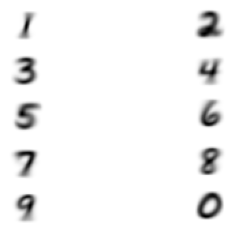

In [0]:
figure = plt.figure()
num_of_images = 10
for index in range(1,num_of_images+1):
    plt.subplot(5,2,index)
    plt.axis('off')
    # plt.imshow(images[index].numpy().squeeze())
    plt.imshow(K_means_avg[index-1].squeeze().cpu().numpy(),cmap = 'gray_r')

In [0]:
K_means_orig = torch.zeros([10,1,28,28])
K_means_features = torch.zeros([10,64,7,7])
count = torch.zeros([10])
for i, (images, labels) in enumerate(trainloader):
    # Run the forward pass
#         images= images.view(100,28,28,1)
    outputs = model2(images)
#     print(outputs.shape)
    for idx,image in enumerate(images):
        K_means_orig[labels[idx]-1]+=image
#         K_means_features[labels[idx]-1] += outputs[labels[idx]-1]
        count[labels[idx]-1]+=1

num_classes=10
for i in range(num_classes):
    K_means_orig[i] = K_means_orig[i]/count[i]
    K_means_features[i] = K_means_features[i]/count[i]

In [0]:
temp = model2(K_means_orig)
for i in range(num_classes):
    if(temp[i].allclose(K_means_features[i])):
      print("Yes")
    else:
      print("Nope")

Nope
Nope
Nope
Nope
Nope
Nope
Nope
Nope
Nope
Nope


In [0]:
temp.shape

torch.Size([10, 64, 7, 7])

In [0]:
temp.isclose